<a href="https://colab.research.google.com/github/isosceles45/DAV55/blob/master/55_DAV_EXP02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression in Python





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Importing data
df = pd.read_csv('/content/drive/MyDrive/dataset_dav/Salary_dataset.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [3]:
df['YearsExperience_normalized'] = 100000 * (df['YearsExperience'] - df['YearsExperience'].min()) / (df['YearsExperience'].max() - df['YearsExperience'].min())
df.head()

,YearsExperience,Salary,YearsExperience_normalized
0,1.2,39344.0,0.000000
1,1.4,46206.0,2127.659574
2,1.6,37732.0,4255.319149
3,2.1,43526.0,9574.468085
4,2.3,39892.0,11702.127660


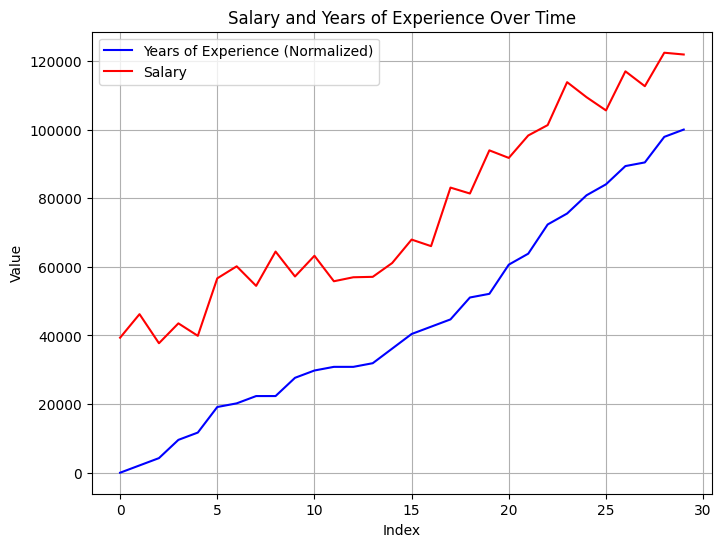

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(df['YearsExperience_normalized'], color='blue', label='Years of Experience (Normalized)')
plt.plot(df['Salary'], color='red', label='Salary')
plt.title('Salary and Years of Experience Over Time')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

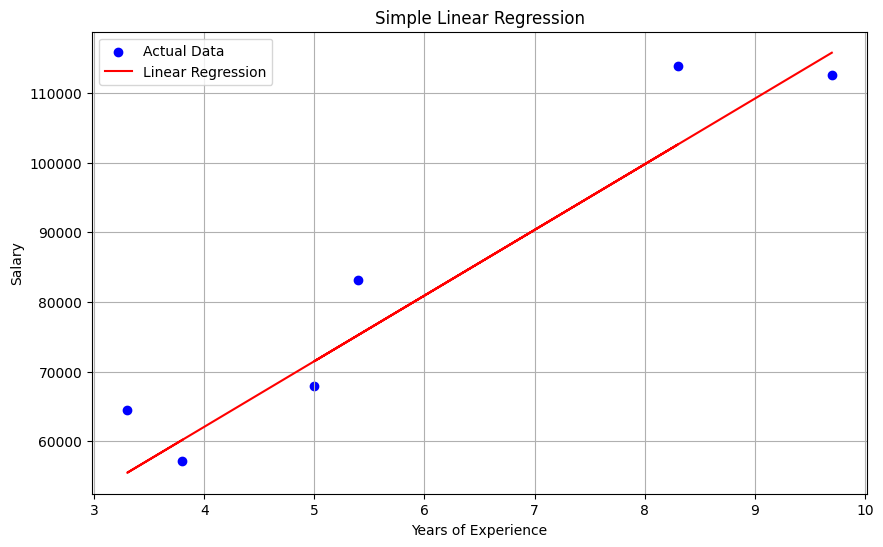

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.title('Simple Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

## Simple Linear Regression in R

In [41]:
library(tidyverse)
library(dplyr)
library(broom)
library(ggplot2)

In [24]:
df <- read.csv('/content/drive/MyDrive/dataset_dav/Salary_dataset.csv')
head(df)

,X,YearsExperience,Salary
,<int>,<dbl>,<dbl>
1,0,1.2,39344
2,1,1.4,46206
3,2,1.6,37732
4,3,2.1,43526
5,4,2.3,39892
6,5,3.0,56643


In [31]:
df$YearsExperience_normalized <- 100000 * (df$YearsExperience - min(df$YearsExperience)) / (max(df$YearsExperience) - min(df$YearsExperience))
head(df)

,X,YearsExperience,Salary,YearsExperience_normalized
,<int>,<dbl>,<dbl>,<dbl>
1,0,1.2,39344,0.000
2,1,1.4,46206,2127.660
3,2,1.6,37732,4255.319
4,3,2.1,43526,9574.468
5,4,2.3,39892,11702.128
6,5,3.0,56643,19148.936


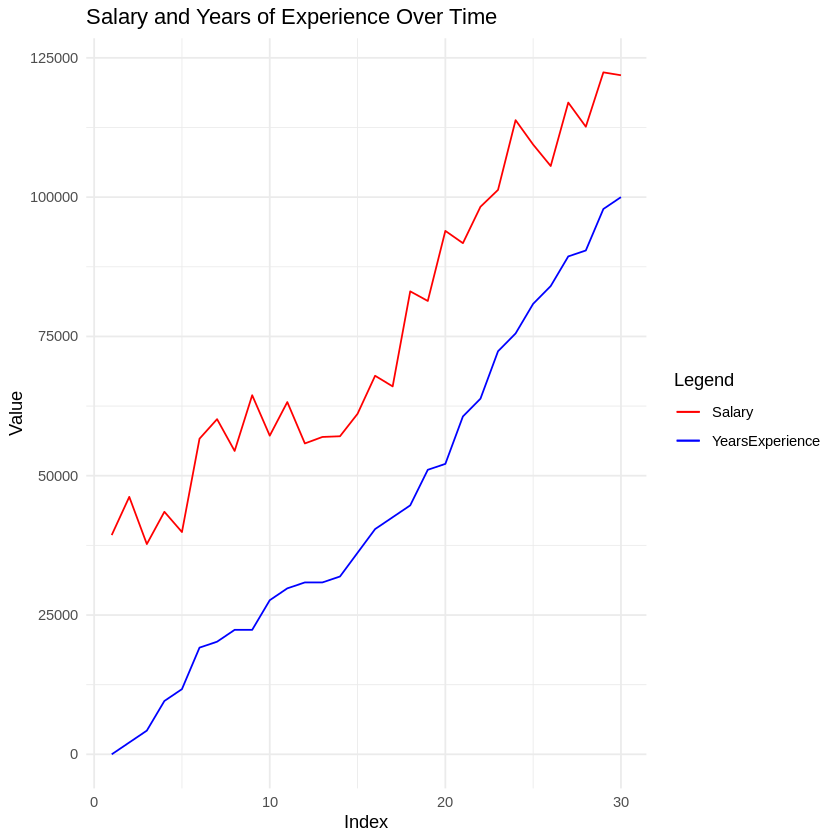

In [37]:
ggplot(df, aes(x = 1:nrow(df))) +
  geom_line(aes(y = Salary, color = "Salary")) +
  geom_line(aes(y = YearsExperience_normalized, color = "YearsExperience")) +
  labs(title = "Salary and Years of Experience Over Time", x = "Index", y = "Value", color = "Legend") +
  scale_color_manual(values = c("Salary" = "red", "YearsExperience" = "blue")) +
  theme_minimal()

In [42]:
set.seed(42)
train_indices <- sample(1:nrow(df), 0.8 * nrow(df))
train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]

In [43]:
model_train <- lm(Salary ~ YearsExperience, data = train_data)

In [44]:
test_data$Predicted_Salary <- predict(model_train, newdata = test_data)

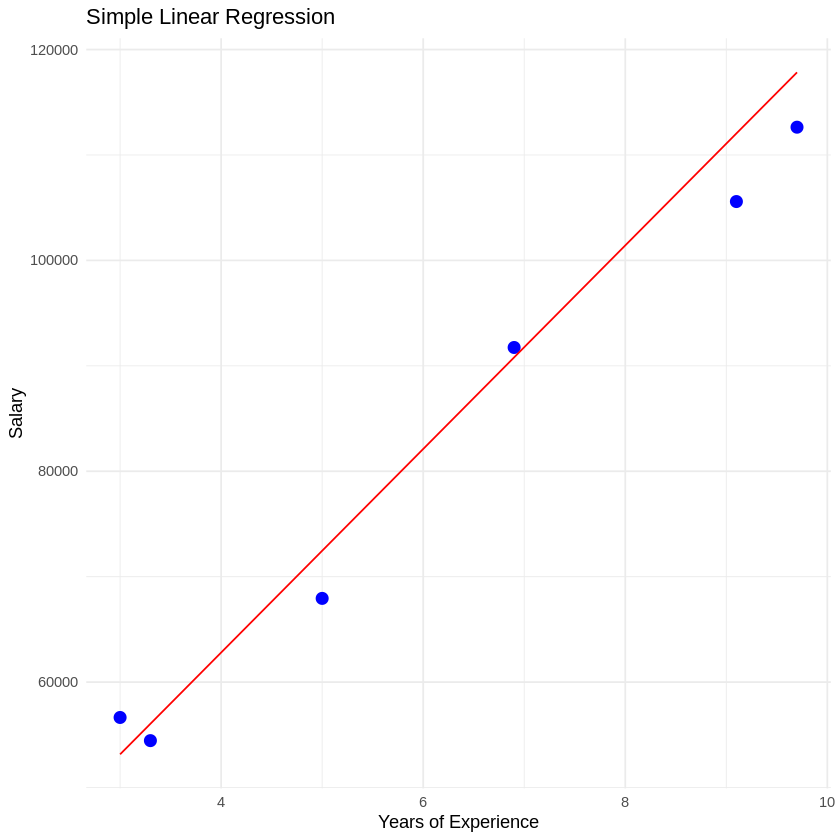

In [45]:
ggplot() +
  geom_point(data = test_data, aes(x = YearsExperience, y = Salary), color = "blue", size = 3) +
  geom_line(data = test_data, aes(x = YearsExperience, y = Predicted_Salary), color = "red") +
  labs(title = "Simple Linear Regression", x = "Years of Experience", y = "Salary") +
  theme_minimal()